In [1]:
print("Hello World!")

Hello World!


# CNN
can be viewed as a layer which mix the convolution layer and fc layer (CNN is different from convolutional layer)

dense layer == linear layer == FC layer

# Some Facts
initially, we are using the CNN for classifying the images

recently, CNN are used in building RNN

# Whay does CNN actually do?
the first after kernel, it captures the edges, curves and corners

then, we use pooling (max)pooling

its actually simplify the image and looks for the feature(numbers) of the image

like the first convolutional layer is trying to capture the edges

then the second convolutional layer is combining the edges and then get circles and curves

then the third convolutional layer is combining the circles and then get patterns

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
# a trick
REBUILD_DATA = True

In [15]:
# data pre-processing is super important

class DogsVSCats():
    IMG_SIZE = 50 # want to normailize all the images, make it 50 * 50 pixels

    # note that data augment is really common in CV

    CATS = '../../../dataset/kagglecatsanddogs_5340/PetImages/Cat'
    DOGS = '../../../dataset/kagglecatsanddogs_5340/PetImages/Dog'

    LABELS = {CATS: 0, DOGS: 1}

    training_data = []

    # keep balanced data is super important 
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS: # iterating the keys
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # color doesnt matter in clasifying the cat and dog
                    # note that we want to make our data and nn as small as possible
                    img = cv2.resize(img, [self.IMG_SIZE, self.IMG_SIZE]) # reshape in 50 * 50
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    # count our data
                    if label == self.CATS:
                        self.catcount += 1
                    if label == self.DOGS:
                        self.dogcount += 1

                except Exception as e:
                    # print(str(e))
                    pass


        np.random.shuffle(self.training_data) # shuffle is inplace
        np.save('training_data.npy', self.training_data)

        print('cats:', self.catcount)
        print('dogs:', self.dogcount)

In [3]:
# COOL!!
# one-hot code
np.eye(5)[2] # 5 classes, one-hot code for class 3(2+1)

array([0., 0., 1., 0., 0.])

In [16]:
if REBUILD_DATA: # never run this again!
    dogsvscats = DogsVSCats()
    dogsvscats.make_training_data()

../../../dataset/kagglecatsanddogs_5340/PetImages/Cat


100%|██████████| 12501/12501 [00:09<00:00, 1337.64it/s]


../../../dataset/kagglecatsanddogs_5340/PetImages/Dog


100%|██████████| 12501/12501 [00:09<00:00, 1271.07it/s]
d:\Users\pc\anaconda\envs\pytorch\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


cats: 12476
dogs: 12470


In [19]:
training_data = np.load('training_data.npy', allow_pickle=True) # ???

In [20]:
print(len(training_data))

24946


In [21]:
print(training_data[0])
# label is [0, 1], hence its a dog

[array([[128, 130, 133, ..., 125, 123, 128],
        [125, 132, 136, ..., 121, 131, 130],
        [119, 114, 123, ..., 121, 124, 131],
        ...,
        [113, 117,  67, ..., 119, 123,  94],
        [129, 119,  85, ..., 121, 101, 118],
        [129,  92,  72, ..., 120,  74,  99]], dtype=uint8) array([0., 1.])]


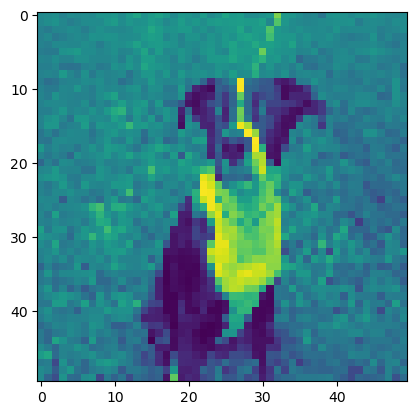

In [22]:
# show the picture
from matplotlib import pyplot as plt

plt.imshow(training_data[0][0])
plt.show()

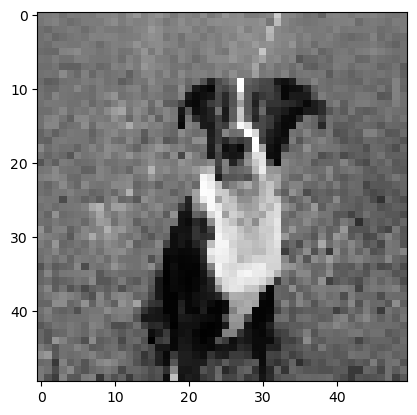

In [23]:
plt.imshow(training_data[0][0], cmap='gray') # matplotlib is not only for image
plt.show()

In [24]:
training_data[0][1]

array([0., 1.])